In [ ]:
# run once and restart
!pip install fastai==2.2.7
!pip install -Uqq fastbook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.utils import shuffle
import gc
import math

In [3]:
reduced_path = 'drive/MyDrive/Dat255 reduced files50/'

diboson     = pd.read_pickle(reduced_path +'diboson.pkl')
DYee     = pd.read_pickle(reduced_path +'DYee.pkl')
DYmumu     = pd.read_pickle( reduced_path  + 'DYmumu.pkl')
DYtautau    = pd.read_pickle( reduced_path  + 'DYtautau.pkl')
ttbar_lep     = pd.read_pickle( reduced_path  + 'ttbar_lep.pkl')
Wenu     = pd.read_pickle( reduced_path  + 'Wenu.pkl')
Wmunu     = pd.read_pickle( reduced_path  + 'Wmunu.pkl')
Wtaunu     = pd.read_pickle( reduced_path  + 'Wtaunu.pkl')
Zee     = pd.read_pickle( reduced_path  + 'Zee.pkl')
ttbar_had     = pd.read_pickle( reduced_path  + 'ttbar_had.pkl')
Ztautau     = pd.read_pickle( reduced_path  + 'Ztautau.pkl')
signal     = pd.read_pickle(reduced_path  + 'signal.pkl')



In [4]:
diboson     = diboson.loc[:,~diboson.columns.duplicated()]
DYee        = DYee.loc[:,~DYee.columns.duplicated()]
DYmumu      = DYmumu.loc[:,~DYmumu.columns.duplicated()]
DYtautau    = DYtautau.loc[:,~DYtautau.columns.duplicated()]
ttbar_lep   = ttbar_lep.loc[:,~ttbar_lep.columns.duplicated()]
Wenu        = Wenu.loc[:,~Wenu.columns.duplicated()]
Wmunu       = Wmunu.loc[:,~Wmunu.columns.duplicated()]
Wtaunu      = Wtaunu.loc[:,~Wtaunu.columns.duplicated()]
Zee         = Zee.loc[:,~Zee.columns.duplicated()]
ttbar_had   = ttbar_had.loc[:,~ttbar_had.columns.duplicated()]
Ztautau     = Ztautau.loc[:,~Ztautau.columns.duplicated()]
signal      = signal.loc[:,~signal.columns.duplicated()]


In [5]:
diboson = shuffle(diboson, random_state = 42)
DYee = shuffle(DYee, random_state = 42)
DYmumu = shuffle(DYmumu, random_state = 42)
DYtautau = shuffle(DYtautau, random_state = 42)
ttbar_lep = shuffle(ttbar_lep, random_state = 42)
Wenu = shuffle(Wenu, random_state = 42)
Wmunu = shuffle(Wmunu, random_state = 42)
Wtaunu = shuffle(Wtaunu, random_state = 42)
Zee = shuffle(Zee, random_state = 42)
ttbar_had = shuffle(ttbar_had, random_state = 42)
Ztautau = shuffle(Ztautau, random_state = 42)
signal = shuffle(signal, random_state = 42)

In [6]:
background = [diboson, DYee, DYmumu, DYtautau, ttbar_lep, Wenu, Wmunu, Wtaunu, Zee, ttbar_had, Ztautau]
backgroundLabel = ['diboson', 'DYee', 'DYmumu', 'DYtautau', 'ttbar_lep', 'Wenu', 'Wmunu', 'Wtaunu', 'Zee', 'ttbar_had', 'Ztautau']


In [7]:
del Zee
del ttbar_lep
del DYmumu
del DYee
del diboson
del Wenu
del Ztautau
gc.collect()

202

In [8]:

features_from_feature_importance = [
                                    "met_et",
                                    "lep_1_E",
                                    "lep_2_E",
                                    "lep_3_E",
                                    "lep_1_eta",
                                    "lep_2_eta",
                                    "jet_n",
                                    "lep_1_pt",
                                    "lep_2_pt",
                                    "lep_3_pt",
                                    "lep_4_pt",
                                    "lep_5_pt",
                                    "lep_1_phi",
                                    "lep_2_phi",
                                    "jet_2_trueflav",
                                    "jet_1_E",
                                    "jet_3_E",
                                    "jet_1_pt",
                                    "jet_2_pt",
                                    "jet_3_pt",
                                    "jet_4_pt",
                                    "jet_5_pt",
                                    "jet_6_pt",
                                    "jet_7_pt",
                                    "jet_8_pt",
                                    "jet_9_pt",
                                    "alljet_n",
                                    "lep_1_etcone20",
                                    "jet_2_MV1",
                                    "jet_1_MV1",
                                    "jet_1_phi",
                                    "jet_1_m",
                                    "jet_2_E",
                                    "jet_2_jvf",
                                    "jet_1_SV0",
                                    ]


invariant_features = [ 'lep_1_pt',
                       'lep_1_eta',
                       'lep_1_phi',
                       'lep_1_type',
                       'lep_1_charge',
                       'lep_1_E',
                       'lep_2_pt',
                       'lep_2_eta',
                       'lep_2_phi',
                       'lep_2_type',
                       'lep_2_charge',
                       'lep_2_E',
                       'jet_1_pt',
                       'jet_1_eta',
                       'jet_1_phi',
                       'jet_2_pt',
                       'jet_2_eta',
                       'jet_2_phi',
          
] 


In [9]:
features_and_weights = list(set(features_from_feature_importance + invariant_features))
features = features_and_weights

In [10]:
for i in range(0,11):
  background[i]['data_type'] = 0

signal['data_type'] = 1

features.append('data_type')

In [11]:
def train_valid_test_split(df, test_pct, valid_pct):
  number_of_train_valid_rows = math.floor(df.shape[0] * (1 - test_pct))
  df_train_valid ,df_test = df.iloc[:number_of_train_valid_rows].copy(),df.iloc[number_of_train_valid_rows:].copy() 

  number_of_train_rows = math.floor(df_train_valid.shape[0] * (1 - valid_pct))
  df_train, df_valid = df_train_valid.iloc[:number_of_train_rows].copy(),df_train_valid.iloc[number_of_train_rows:].copy() 

  return df_train, df_valid, df_test

In [12]:
background_train = [None]*len(background)
background_valid = [None]*len(background)
background_test = [None]*len(background)

for i in range(len(background)):
  background[i].reset_index()
  background_train[i], background_valid[i], background_test[i] = train_valid_test_split(background[i], 0.6, 0.3)

In [13]:
signal.reset_index()
signal_train, signal_valid, signal_test = train_valid_test_split(signal, 0.6, 0.3)

In [14]:
# Only interested in a test set.
# We are now using half the data, so the test set is quite large.

df_test =  pd.concat(
    [background_test[0][features],
    background_test[1][features],
    background_test[2][features],
    background_test[3][features],
    background_test[4][features],
    background_test[5][features],
    background_test[6][features],
    background_test[7][features],
    background_test[8][features],
    background_test[9][features],
    background_test[10][features],
    signal_test[features]]
)
features.remove('data_type')

# Import the Neural Network

and predict on the test set.

In [15]:
import numpy as np
from fastai import *
from fastai.vision import *
from fastai.tabular.all import *
import fastbook

In [16]:
import matplotlib.pyplot as plt

In [17]:
# One of the best performing NN-models on the 10% dataset
learner =load_learner("drive/MyDrive/Colab Notebooks/model.pkl")

In [18]:
seed = 42

In [19]:
# mean normalize test data 
df_test_norm = df_test.copy(deep=True)

In [20]:
[df_test_norm[col].update((df_test_norm[col] - df_test_norm[col].min()) / (df_test_norm[col].max() - df_test_norm[col].min())) for col in df_test_norm[features].columns]
print("")

In [23]:
dl = learner.dls.test_dl(df_test_norm)

In [24]:
preds, real = learner.get_preds(dl=dl)

In [27]:
# If confidence is over 50 either way it labels it acordingly
def get_predictions_int(predictions):
  predicted = []
  for i in predictions:
    if i[0] > i[1]:
      predicted.append(0)
    else:
      predicted.append(1)
  return predicted

In [29]:
preds_int = get_predictions_int(preds)

In [30]:
df_test['predictions'] = preds_int

In [32]:
df_test.shape

(3429875, 44)

In [40]:
# split the signal from the background 
predicted_signal_df     = df_test.loc[df_test['predictions'] == 1]
actual_signal_df        = df_test.loc[df_test['data_type'] == 1]

In [ ]:
predicted_signal_df.head()

# Calculating the mass

now that we have a unormalized dataframe with all the predictions

we can now calculate the mass of the ones that were predicted as Signal

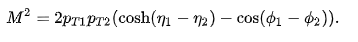

In [35]:
# Returns M
def invariant_mass(pt1,pt2,eta1,eta2,phi1,phi2):
   return np.sqrt(2 * (pt1 * pt2) * (np.cosh(eta1 - eta2) - np.cos(phi1 - phi2)))

In [53]:
def plot_mass(mass, bins=50, log=False):
  plt.figure(figsize=(12,8))
  plt.xlabel('Invariant Mass')
  plt.ylabel('events')
  if type(bins) == int:
    plt.title(f"Signal - Electron - bins = {bins}")
  else:
    plt.title("Signal - Electron")

  axes = plt.gca()

  if log:
    plt.yscale('log')
    plt.title(axes.get_title() + " - log")
  
  plt.hist(mass, bins=bins, histtype="step")
  print("\n")

In [54]:
def plot_leps_and_jets(invariant_df, bins=50, log=False):
  plot_mass(invariant_mass(
      invariant_df['lep_1_pt'],
      invariant_df['lep_2_pt'],
      invariant_df['lep_1_eta'],
      invariant_df['lep_2_eta'],
      invariant_df['lep_1_phi'],
      invariant_df['lep_2_phi']
  ),bins=bins, log=log)

  plot_mass(invariant_mass(
      invariant_df['jet_1_pt'],
      invariant_df['jet_2_pt'],
      invariant_df['jet_1_eta'],
      invariant_df['jet_2_eta'],
      invariant_df['jet_1_phi'],
      invariant_df['jet_2_phi']
  ),bins=bins, log=log)


# Graphs showing invariant mass

Log version included further below, might not be as usefull as the data set is fairly small compared to the full data set.

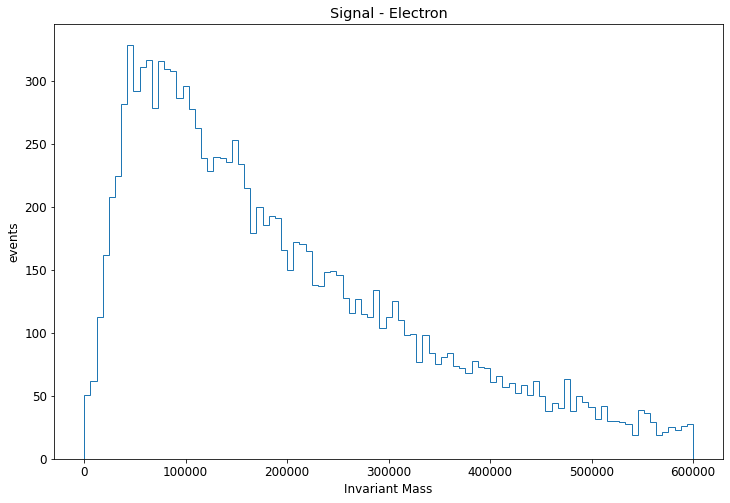

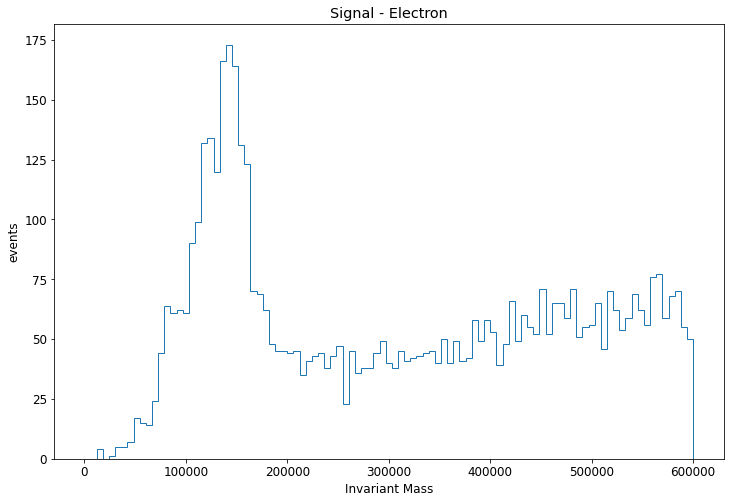

In [68]:
# predicted no log
plot_leps_and_jets(predicted_signal_df, bins=np.linspace(0,600e3,100))

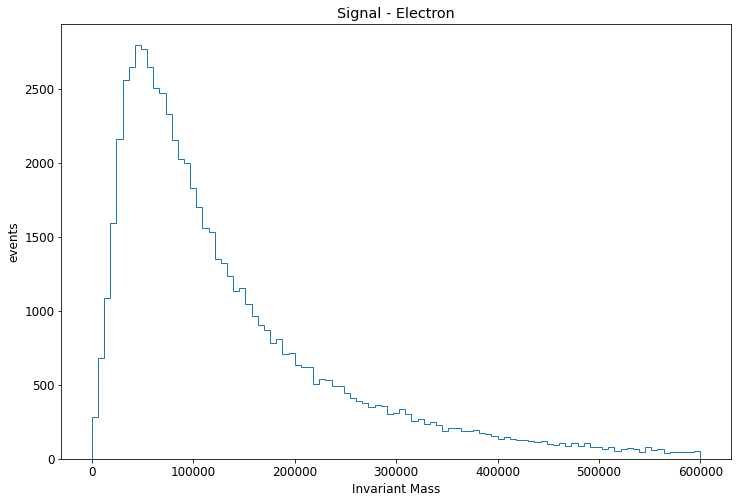

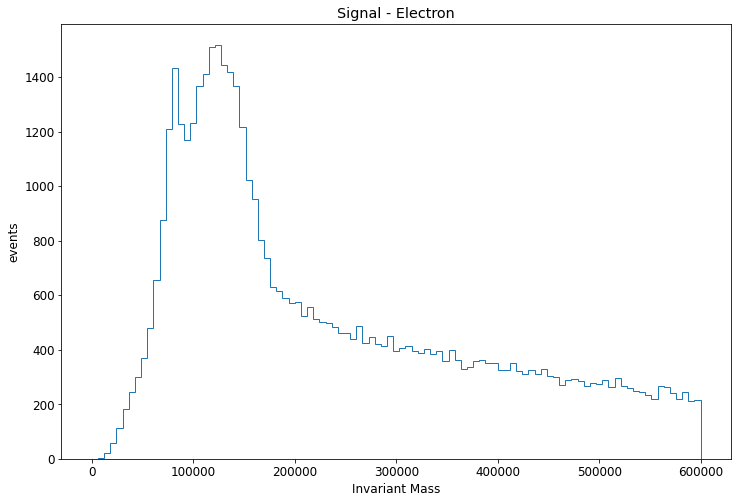

In [62]:
# actual no log
plot_leps_and_jets(actual_signal_df , bins=np.linspace(0,600e3,100))

#Log versions below

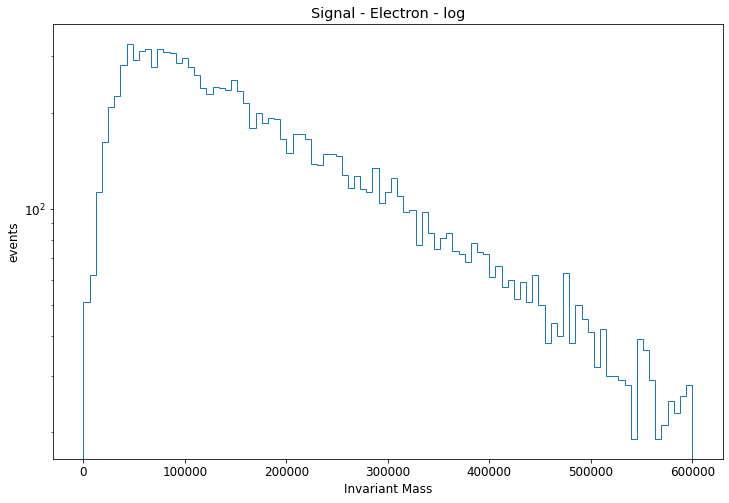

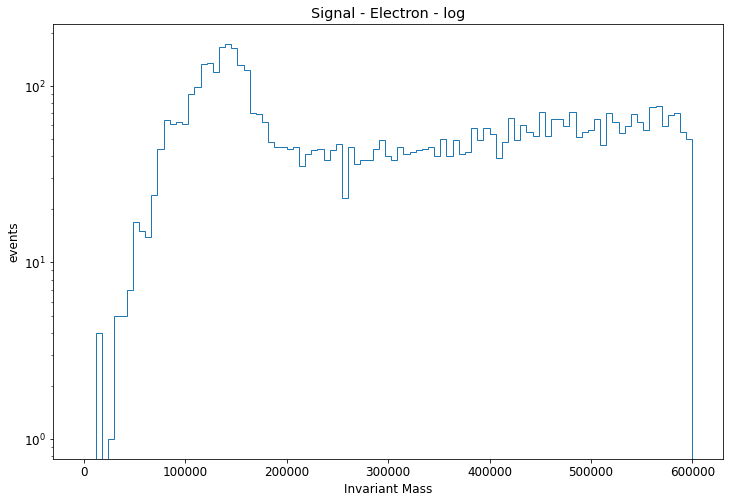

In [61]:
# predicted log
plot_leps_and_jets(predicted_signal_df, bins=np.linspace(0,600e3,100),log=True)

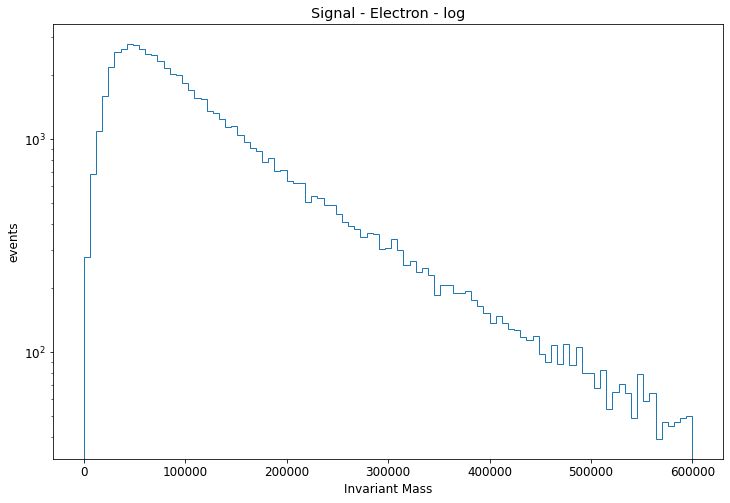

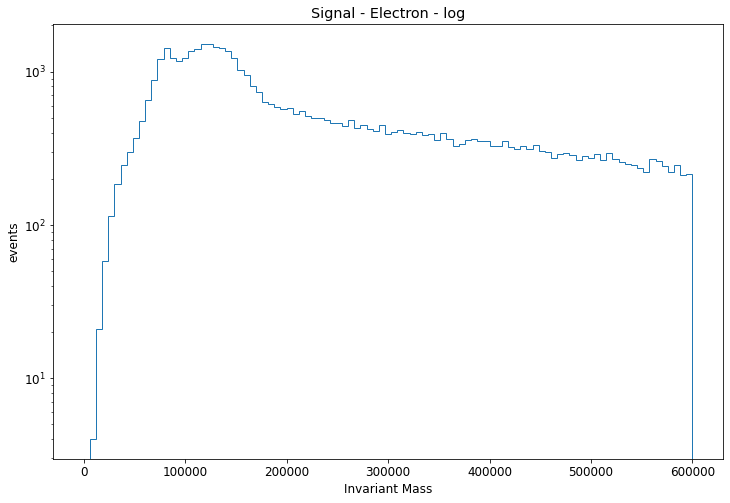

In [63]:
# actual log
plot_leps_and_jets(actual_signal_df , bins=np.linspace(0,600e3,100), log=True)